In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import QuantileTransformer

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [2]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,221900
1,6414100192,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,538000
2,5631500400,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,180000
3,2487200875,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,604000
4,1954400510,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.3460,1530,1509,360000
21593,6600060120,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.3620,1830,7200,400000
21594,1523300141,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.2990,1020,2007,402101
21595,291310100,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.0690,1410,1287,400000


In [3]:
df = df.drop(['id', 'lat', 'long'], axis=1)
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [4]:
df['yr_built']= list(map(lambda x: 2015-x, df['yr_built']))

In [5]:
df.rename(columns = {'yr_built' : 'age_build'}, inplace=True)

In [6]:
df['yr_renovated'] = list(map(lambda x: 2015-x if x !=0 else x, df['yr_renovated']))
df.rename(columns = {'yr_renovated' : 'age_reno'}, inplace=True)

In [7]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_build,age_reno,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,60,0,98178,1340,5650,221900
1,2014-12-09,3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,64,24,98125,1690,7639,538000
2,2015-02-25,2,1.0000,770,10000,1.0000,0,0,3,6,770,0,82,0,98028,2720,8062,180000
3,2014-12-09,4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,50,0,98136,1360,5000,604000
4,2015-02-18,3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,28,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.5000,1530,1131,3.0000,0,0,3,8,1530,0,6,0,98103,1530,1509,360000
21593,2015-02-23,4,2.5000,2310,5813,2.0000,0,0,3,8,2310,0,1,0,98146,1830,7200,400000
21594,2014-06-23,2,0.7500,1020,1350,2.0000,0,0,3,7,1020,0,6,0,98144,1020,2007,402101
21595,2015-01-16,3,2.5000,1600,2388,2.0000,0,0,3,8,1600,0,11,0,98027,1410,1287,400000


<AxesSubplot:>

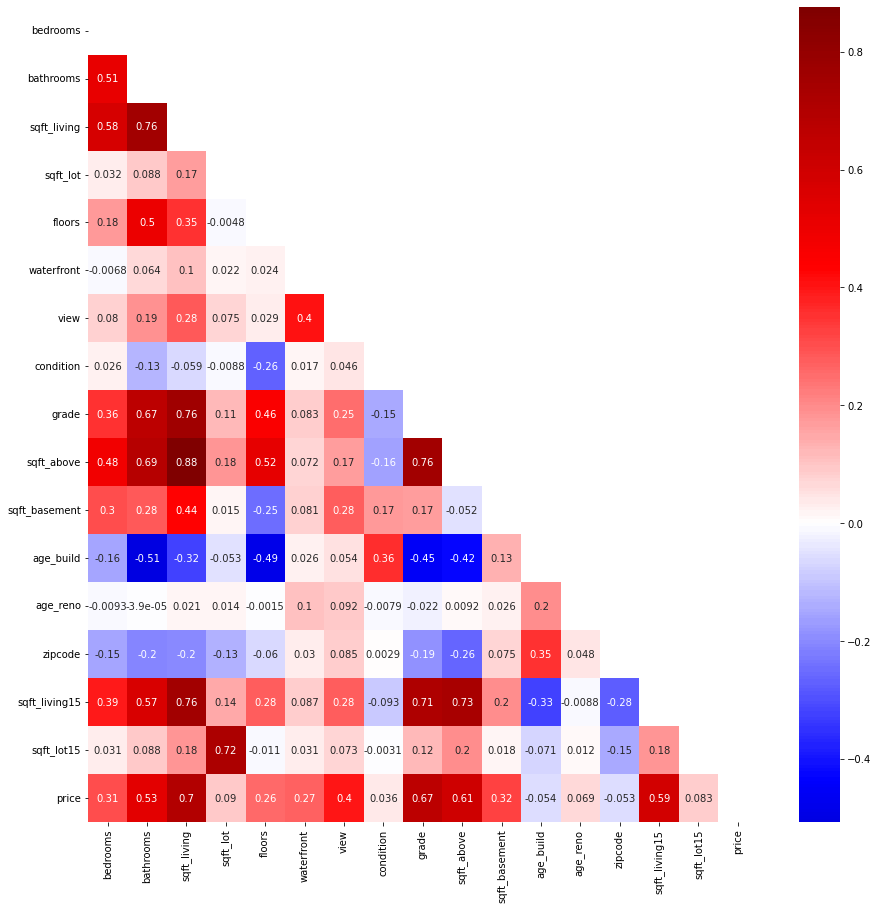

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)